
1. You are provided the titanic dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Use the Logistic regression created from scratch (from the prev question) in this question as well.
3. Data cleaning plays a major role in this question. Report all the methods used by you in the ipynb.

--> 

i. Check for missing values

ii. Drop Columns & Handle missing values

iii. Create dummies for categorical features

you are free to perform other data cleaning to improve your results.



4. Report accuracy score, Confusion matrix, heat map, classifiaction report and any other metrics you feel useful.

dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

(titanic.csv)


In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/SMAI/Assignment2/q_datasets
!pwd
!ls

Mounted at /content/drive
/content/drive/MyDrive/SMAI/Assignment2/q_datasets
/content/drive/MyDrive/SMAI/Assignment2/q_datasets
'archive (1).zip'   fashion_mnist   titanic.csv   X.npy   Y.npy


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.preprocessing import OneHotEncoder

In [28]:
df_data_org = pd.read_csv('titanic.csv', na_values=np.NaN)
print(df_data_org.shape)
display(df_data_org.head())
display(df_data_org.info())
display(df_data_org.describe())

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
# checking missing valued columns with counts
missing_val_count_by_column = (df_data_org.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Age         177
Cabin       687
Embarked      2
dtype: int64


In [30]:
### Embarked has only 2 null rows, so remove those rows
df_data_org = df_data_org[df_data_org['Embarked'].notna()]
print(df_data_org.shape)
missing_val_count_by_column = (df_data_org.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

(889, 12)
Age      177
Cabin    687
dtype: int64


In [31]:
### Replace missing age with median age (to keep the distribution same) of each (pclass, sex) group
df_data_org['Age'] = df_data_org.groupby(['Sex','Pclass'])['Age'].apply(lambda a: a.fillna(a.median()))
print(df_data_org.shape)
missing_val_count_by_column = (df_data_org.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])
display(df_data_org.info())

(889, 12)
Cabin    687
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 130.3+ KB


None

Though cabin has less non-null rows, the floor on which a person stayed matters as it tells if he could reach the top-floor quickly or no, So extacted only the floow (1st char) of the cabin number

In [32]:
df_data_org['Cabin_floor'] = df_data_org['Cabin'].apply(lambda c: c[0] if pd.notnull(c) else 'M')
df_data_org = df_data_org.drop(['Cabin'], axis=1)
print(df_data_org.shape)
missing_val_count_by_column = (df_data_org.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])
display(df_data_org.info())

(889, 12)
Series([], dtype: int64)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
 11  Cabin_floor  889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 130.3+ KB


None

Dropping columns passenger-id, name and ticket as they are unique for every person and do dot contain any specific information

In [33]:
df_data_org = df_data_org.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
print(df_data_org.shape)
missing_val_count_by_column = (df_data_org.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])
display(df_data_org.info())
display(df_data_org.head())

(889, 9)
Series([], dtype: int64)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     889 non-null    int64  
 1   Pclass       889 non-null    int64  
 2   Sex          889 non-null    object 
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   Embarked     889 non-null    object 
 8   Cabin_floor  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 109.5+ KB


None

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_floor
0,0,3,male,22.0,1,0,7.2500,S,M
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,M
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,M


Converting to one-hot encoding for classes: Sex, Cabin_floor and Embarked. Ordinal encoding is not used for Embarked as the ship sank before anyone could reach the destination so there is no order. For cabin_floor, many values were missing so we cannot assign proper order for missing category so we keep it one-hot encoded

In [34]:
cat_to_num = {"Sex":{'female':0, 'male':1}}
df_data_org = df_data_org.replace(cat_to_num)

enc_feats = []

for feat in ['Cabin_floor', 'Embarked']:
    onehot_enc = OneHotEncoder().fit_transform(df_data_org[feat].values.reshape(-1,1)).toarray()
    n = df_data_org[feat].nunique()
    colnames = [feat+'_'+str(i) for i in range(n)]
    df_onehotenc = pd.DataFrame(onehot_enc, columns=colnames, index=df_data_org.index)
    enc_feats.append(df_onehotenc)
    df_data_org.drop([feat], axis=1, inplace=True)

df_data_org = pd.concat([df_data_org, *enc_feats], axis=1)  
  

print(df_data_org.shape)
display(df_data_org.head())
display(df_data_org.info())

(889, 19)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_floor_0,Cabin_floor_1,Cabin_floor_2,Cabin_floor_3,Cabin_floor_4,Cabin_floor_5,Cabin_floor_6,Cabin_floor_7,Cabin_floor_8,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,22.0,1,0,7.2500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       889 non-null    int64  
 1   Pclass         889 non-null    int64  
 2   Sex            889 non-null    int64  
 3   Age            889 non-null    float64
 4   SibSp          889 non-null    int64  
 5   Parch          889 non-null    int64  
 6   Fare           889 non-null    float64
 7   Cabin_floor_0  889 non-null    float64
 8   Cabin_floor_1  889 non-null    float64
 9   Cabin_floor_2  889 non-null    float64
 10  Cabin_floor_3  889 non-null    float64
 11  Cabin_floor_4  889 non-null    float64
 12  Cabin_floor_5  889 non-null    float64
 13  Cabin_floor_6  889 non-null    float64
 14  Cabin_floor_7  889 non-null    float64
 15  Cabin_floor_8  889 non-null    float64
 16  Embarked_0     889 non-null    float64
 17  Embarked_1     889 non-null    float64
 18  Embarked_2

None

Removing the last columns of Cabin_floor and Embarked, as all zeros implies these categories

In [35]:
df_data_org = df_data_org.drop(['Cabin_floor_8', 'Embarked_2'], axis=1)
print(df_data_org.shape)
display(df_data_org.info())

(889, 17)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       889 non-null    int64  
 1   Pclass         889 non-null    int64  
 2   Sex            889 non-null    int64  
 3   Age            889 non-null    float64
 4   SibSp          889 non-null    int64  
 5   Parch          889 non-null    int64  
 6   Fare           889 non-null    float64
 7   Cabin_floor_0  889 non-null    float64
 8   Cabin_floor_1  889 non-null    float64
 9   Cabin_floor_2  889 non-null    float64
 10  Cabin_floor_3  889 non-null    float64
 11  Cabin_floor_4  889 non-null    float64
 12  Cabin_floor_5  889 non-null    float64
 13  Cabin_floor_6  889 non-null    float64
 14  Cabin_floor_7  889 non-null    float64
 15  Embarked_0     889 non-null    float64
 16  Embarked_1     889 non-null    float64
dtypes: float64(12), int64(5)
memory usage: 165.0

None

No 2 columns have very high correlation, so we take all

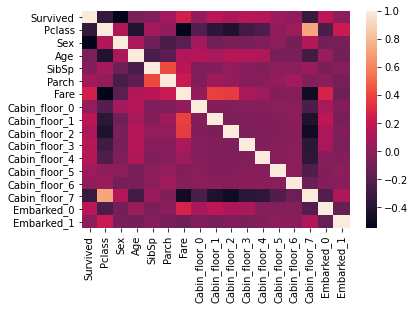

In [38]:
corr = df_data_org.corr()
sn.heatmap(corr)

As columns have different scales, we standardize the data to keep the relative distances within features same

In [39]:
X = np.array(df_data_org.drop('Survived', axis=1))
y = np.array(df_data_org.Survived)
print(len(X))
print(len(y))


X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0)
print(X_train_org.shape, y_train.shape)
print(X_test_org.shape, y_test.shape)

'''Standardize X'''
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_org)
X_test_std = scaler.transform(X_test_org)


889
889
(622, 16) (622,)
(267, 16) (267,)


In [42]:
class MyLogRegressor(object):
    def __init__(self, lr=0.2, itrs=100):
        self.lr = lr 
        self.itrs = itrs
        self.W = None
        self.cost = None
        self.method = None
    
    def fit(self, X, Y):
        X = np.insert(X, 0, 1, axis=1)
        n = len(Y)
        W = np.zeros(X.shape[1])
        cost = []
        for i in range(self.itrs):
            Z = X.dot(W)
            H = self.sigmoid(Z)
            W = self.gradient_desc(X,H,W,Y,n)
            cost.append(self.cal_cost(H,W,Y)) 
        self.W = W
        self.cost = cost
        return self

    def gradient_desc(self,X,H,W,Y,n):
        gradient = np.dot(X.T, (H - Y)) / n
        W = W - self.lr * gradient
        return W 

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def cal_cost(self,H,W,Y):
        n = len(Y)
        cost = (np.sum(-Y.T.dot(np.log(H)) - (1 - Y).T.dot(np.log(1 - H)))) / n
        return cost

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        Y_pred = [round(self.sigmoid(i.dot(self.W))) for i in X ]
        return Y_pred

    def cal_score(self,X, Y):
        score = sum(self.predict(X) == Y) / len(Y)
        return score
    
    def plot_cost(self): 
        plt.plot(range(self.itrs), self.cost)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('Convergence Graph of Cost Function')
        # plt.legend()
        plt.show()


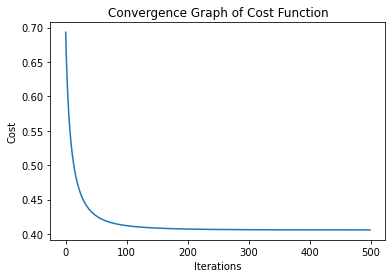

Training accuracy: 0.8279742765273312


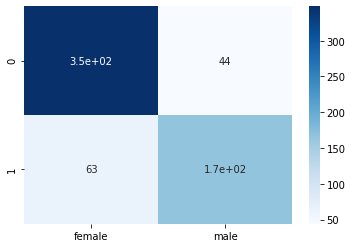

In [45]:
itrs = 500
logreg = MyLogRegressor(lr=0.2, itrs=itrs).fit(X_train_std, y_train)
logreg.plot_cost()

myscore1 = logreg.cal_score(X_train_std,y_train)
y_pred1 = logreg.predict(X_train_std)
print("Training accuracy:",myscore1)
conf_mat1 = confusion_matrix(y_train, y_pred1)
df_cm1 = pd.DataFrame(conf_mat1, index = [i for i in range(2)], columns = ['female', 'male'])
plt.figure()
sn.heatmap(df_cm1, annot=True, cmap='Blues')

Testing accuracy: 0.7940074906367042


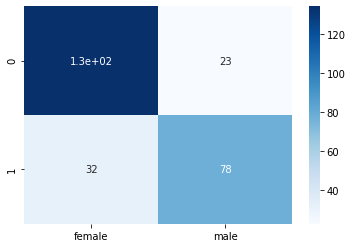

In [46]:
myscore2 = logreg.cal_score(X_test_std,y_test)
y_pred2 = logreg.predict(X_test_std)
print("Testing accuracy:",myscore2)
conf_mat2 = confusion_matrix(y_test, y_pred2)
df_cm2 = pd.DataFrame(conf_mat2, index = [i for i in range(2)], columns = ['female', 'male'])
plt.figure()
sn.heatmap(df_cm2, annot=True, cmap='Blues')

Comparing with SKlearn's Logistic regression

In [47]:
clf = LogisticRegression(random_state=1,max_iter=100).fit(X_train_std, y_train)
sk_score = clf.score(X_test_std, y_test)
print(sk_score)

clf = LogisticRegression(random_state=1,max_iter=1000).fit(X_train_org, y_train)
sk_score = clf.score(X_test_org, y_test)
print(sk_score)

0.7940074906367042
0.7902621722846442
